# Airfoil_Regression

Data Set Information:

The NASA data set comprises different size NACA 0012 airfoils at various wind tunnel speeds and angles of attack. The span of the airfoil and the observer position were the same in all of the experiments.


Attribute Information:

This problem has the following inputs:
1. Frequency, in Hertzs.
2. Angle of attack, in degrees.
3. Chord length, in meters.
4. Free-stream velocity, in meters per second.
5. Suction side displacement thickness, in meters.

The only output is:
6. Scaled sound pressure level, in decibels.

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import dataset

df = pd.read_csv("airfoil_self_noise.dat", sep= "\t",header=None)

In [3]:
df.head()

,0,1,2,3,4,5
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


In [4]:
df.columns = ['Frequency','Angle of attack','Cord length','Free-stream velocity','Sunction side','Pressure level']

In [5]:
df.head()

,Frequency,Angle of attack,Cord length,Free-stream velocity,Sunction side,Pressure level
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Frequency             1503 non-null   int64  
 1   Angle of attack       1503 non-null   float64
 2   Cord length           1503 non-null   float64
 3   Free-stream velocity  1503 non-null   float64
 4   Sunction side         1503 non-null   float64
 5   Pressure level        1503 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 70.6 KB


In [7]:
from sklearn.model_selection import train_test_split

X = df.iloc[: , :-1]
y = df.iloc[: , -1]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state=42)

In [8]:
X_train.head()

,Frequency,Angle of attack,Cord length,Free-stream velocity,Sunction side
845,500,11.2,0.0508,71.3,0.014072
1026,10000,4.8,0.0254,55.5,0.000873
621,2000,7.2,0.1524,39.6,0.009092
1371,630,6.7,0.1016,31.7,0.005929
195,6300,0.0,0.2286,71.3,0.002143


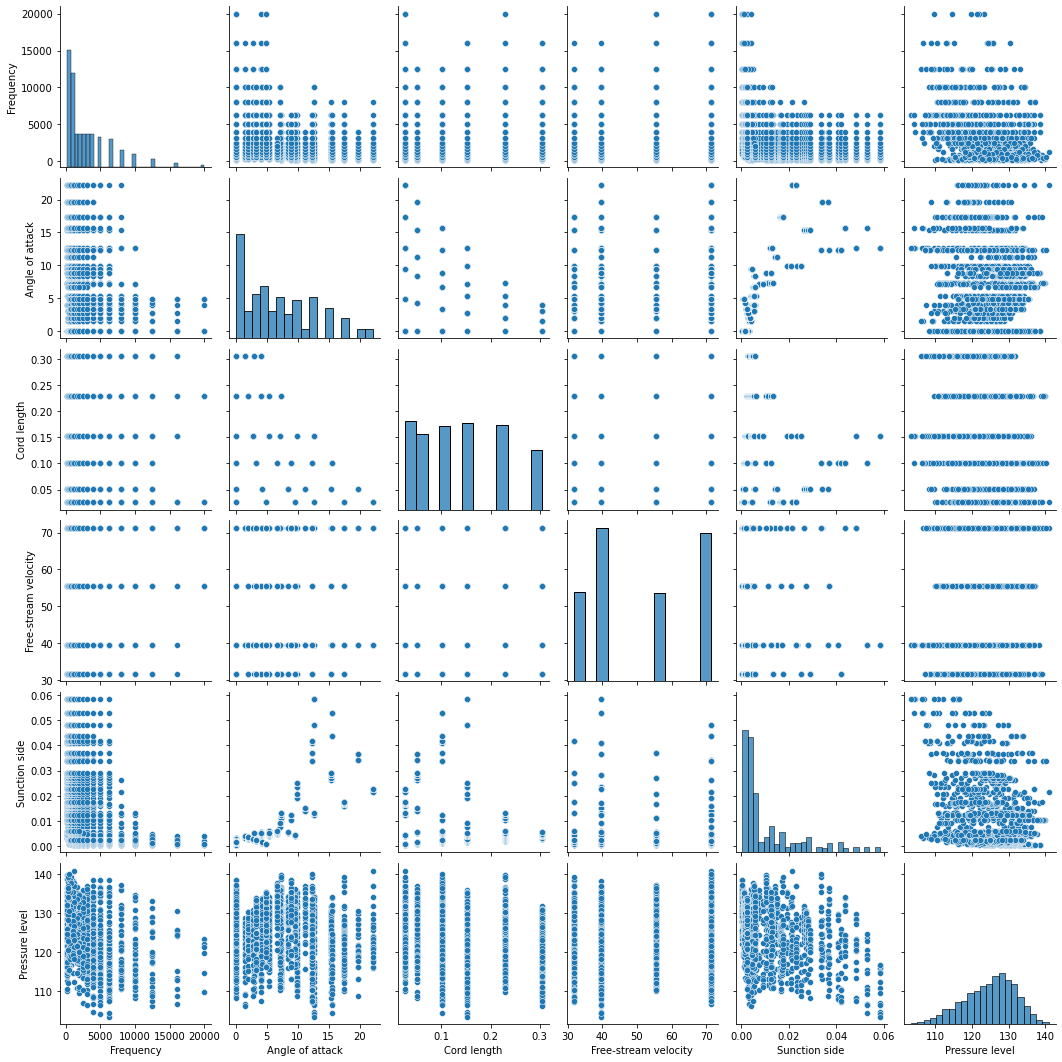

In [10]:
sns.pairplot(df)

In [11]:
X_train.corr()

,Frequency,Angle of attack,Cord length,Free-stream velocity,Sunction side
Frequency,1.000000,-0.273327,-0.000324,0.125247,-0.239878
Angle of attack,-0.273327,1.000000,-0.498257,0.058603,0.762567
Cord length,-0.000324,-0.498257,1.000000,0.013061,-0.220849
Free-stream velocity,0.125247,0.058603,0.013061,1.000000,-0.000519
Sunction side,-0.239878,0.762567,-0.220849,-0.000519,1.000000


C:\Users\ashis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Frequency'>

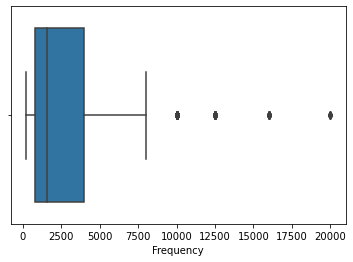

In [12]:
sns.boxplot(df['Frequency'])


C:\Users\ashis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Frequency', ylabel='Pressure level'>

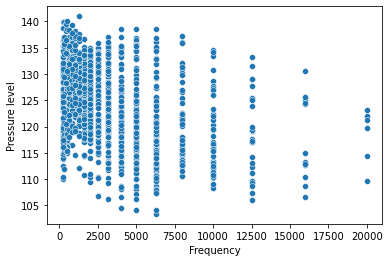

In [13]:
sns.scatterplot(df['Frequency'], df['Pressure level'])

In [14]:
len(df['Pressure level'].unique())

1456

C:\Users\ashis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pressure level'>

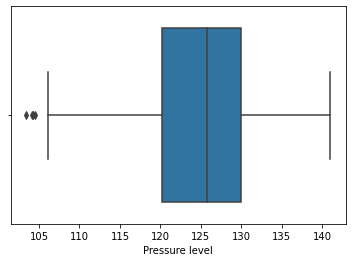

In [15]:
sns.boxplot(df['Pressure level'])

# Simple Linear Regression

In [16]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

lin_regressor=LinearRegression()
mse=cross_val_score(lin_regressor,X,y,scoring='neg_mean_squared_error',cv=5)
mean_mse=np.mean(mse)
print(mean_mse)

-27.188623343053393


In [17]:
lin_regressor.fit(X,y)

LinearRegression()

In [18]:
prediction_lin=lin_regressor.predict(X_test)

In [22]:
l_r2 = r2_score(y_test,prediction_lin)

In [23]:
l_r2*100

51.74349420629486

# Ridge Regression

In [24]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X,y)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [25]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 0.01}
-27.139316557424102


# Lasso Regression

In [26]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)

lasso_regressor.fit(X,y)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 1e-08}
-27.188623172373422


C:\Users\ashis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14331.039964975373, tolerance: 5.837267824214975
  model = cd_fast.enet_coordinate_descent(
C:\Users\ashis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13857.576897765966, tolerance: 5.453631819615308
  model = cd_fast.enet_coordinate_descent(
C:\Users\ashis\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12468.815210135179, tolerance: 5.4214056751073985
  model = cd_fast.enet_coordinate_descent(


In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [28]:
prediction_lasso=lasso_regressor.predict(X_test)
prediction_ridge=ridge_regressor.predict(X_test)

C:\Users\ashis\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Pressure level', ylabel='Density'>

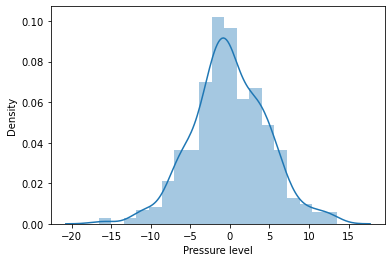

In [29]:
import seaborn as sns

sns.distplot(y_test-prediction_lasso)

C:\Users\ashis\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Pressure level', ylabel='Density'>

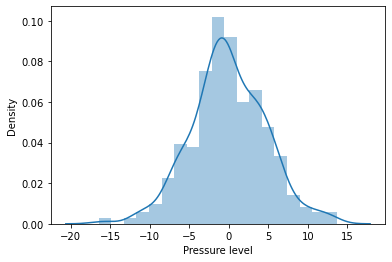

In [30]:
import seaborn as sns

sns.distplot(y_test-prediction_ridge)

In [31]:
from sklearn.metrics import r2_score

In [32]:
r2 = r2_score(y_test,prediction_ridge)

In [33]:
r2*100

52.75715598208664

In [35]:
import pickle

pickle.dump(ridge_regressor,open('model.pkl','wb'))

In [36]:
pickled_model = pickle.load(open('model.pkl','rb'))

pickled_model.predict(X_test)


array([126.24295786, 120.61311634, 118.07300731, 128.67632125,
       124.57347684, 129.39152326, 120.38596186, 133.31732547,
       119.54304247, 126.24597163, 125.20343989, 126.60422918,
       132.52205839, 121.12947805, 124.0297584 , 119.03652122,
       128.83378202, 123.05402422, 118.31772236, 124.74450237,
       122.04917485, 127.0758305 , 127.05124727, 125.52314   ,
       128.60886259, 122.78473746, 116.69149522, 126.88015598,
       128.1563725 , 126.16726942, 129.77959345, 124.06935546,
       109.80530721, 127.13682606, 127.92664254, 129.48878132,
       119.89877686, 103.81698524, 126.93701701, 129.47487717,
       132.04812514, 123.06739041, 124.57139524, 118.24902524,
       116.36350247, 131.1095183 , 126.90446775, 130.1620781 ,
       131.66066344, 123.60293582, 120.76712389, 124.18521674,
       118.57754226, 124.71105504, 122.38648746, 123.76646436,
       113.80605422, 125.64154402, 124.34358773, 120.04080891,
       125.32081586, 125.416657  , 127.78512932, 130.27

In [ ]:
dict_test={"Frequency": 9,
           "Angle of attack": 8,
           "Cord length": 10,
           "Free-stream velocity": 1,
           "Sunction side":7}